<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_remote_sensing_first.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_remote_sensing_first.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Raster data manipulation
[Raster data](https://rspatial.org/raster/spatial/4-rasterdata.html#) divides space into cells (rectangles; pixels) of equal size (in units of the coordinate reference system). Such continuous spatial data are also referred to as "grid" data, and be contrasted with discrete (object based) spatial data (points, lines, polygons).

## Install R packages
The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-5) package provides classes and functions to manipulate geographic data in "raster" format. 
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.



In [ ]:
install.packages("raster")


The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.

In [ ]:
library(raster)

Set the current working directory of the R process with the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function.

In [ ]:
setwd("/content")

## Upload file
1. Download Landsat images of the [*Parakanã Indigenous Reserve*](https://pib.socioambiental.org/en/Povo:Parakan%C3%A3) in the state of Pará (northern region of Brazil) for the years 1988 and 2011. Use this [link]() to get the data to use in this example.

2. On the left side of Google Colab click on the small folder icon named file ⇒ click the Upload icon ⇒ choose the files to upload from your "Downloads" folder and click OK. Otherwise, drag your files to Google Colab storage. Now your files are on Google Colab!



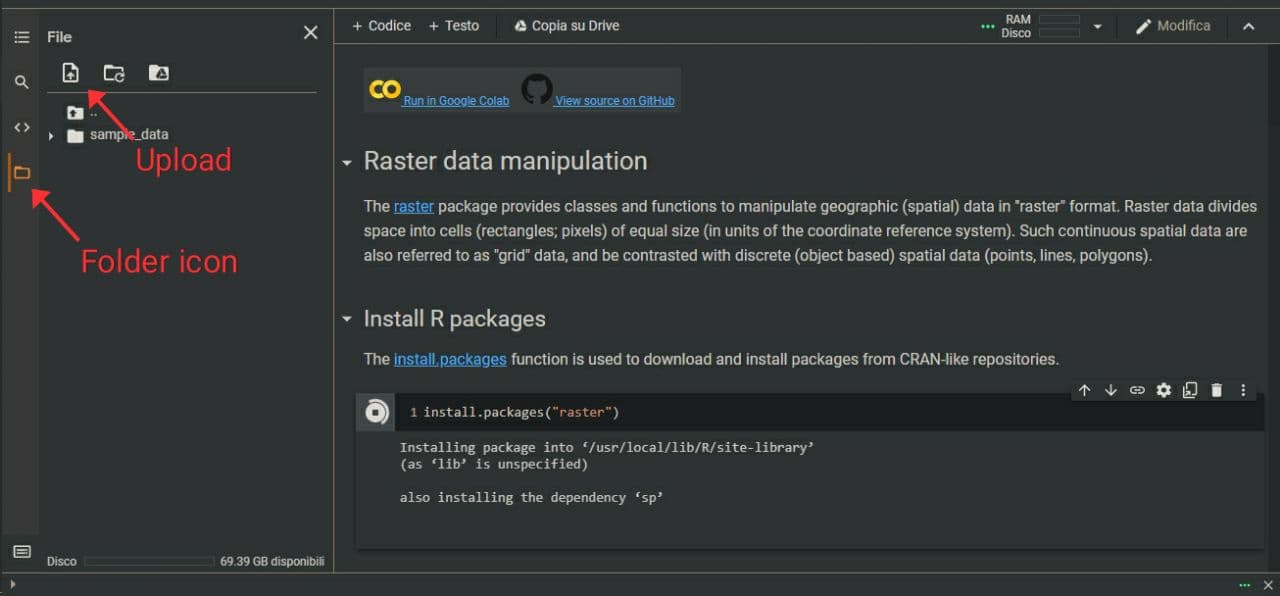

## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function.
Select the images already pre-processed for the year 2011.

In [ ]:
p224r63_2011 <- brick("p224r63_2011_masked.grd")

Explore the properties of the `p224r63_2011` object.

In [ ]:
p224r63_2011

### Lansat bands:
B1 = *Blue*; 
B2 = *Green*;
B3 = *Red*;
B4 = *Near Infrared*;
B5 = *Short Wave Infrared*;
B6 = *Thermal Infrared*;
B7 = *Short Wave Infrared*.

## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.

In [ ]:
plot(p224r63_2011)

### Colour change
Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into `n` levels.

In [ ]:
n <- 100
cl <- colorRampPalette(c("black","grey","light grey")) (n)
plot(p224r63_2011, col=cl)

In [ ]:
cl <- colorRampPalette(c("magenta","blue","green","yellow","red")) (n*2)
plot(p224r63_2011, col=cl)

Multi-layer Raster objects can be plotted as individual layers. Select a single band or layer with the `$` operator.



In [ ]:
plot(p224r63_2011$B4_sre)

Individual bands can also be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from Landsat and other multi-band satellite images.
In the `plotRGB()` function the `stretch` argument increases the contrast of the image through the use of two [methods](http://spatial-analyst.net/ILWIS/htm/ilwisapp/stretch_functionality.htm): "lin" or "hist".


In [ ]:
# true color image with linear stretch
plotRGB(p224r63_2011, r = 3, g = 2, b = 1, stretch = "lin")

In [ ]:
# false color image with histogram stretch
plotRGB(p224r63_2011, r = 4, g = 3, b = 2, stretch = "hist")

### Multi-frame images
Using the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function it is possible to set the parameters of the graphic output. Subsequent figures will be drawn in an array on the device by columns `mfcol`, or rows `mfrow`, respectively.

In [ ]:
# 2 row, 1 columns
par(mfrow=c(2,1)) # if you are using columns first: par(mfcol=c(1,2))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)

In [ ]:
# a quadrat of bands...
par(mfrow=c(2,2))
clb <- colorRampPalette(c("dark blue","blue","light blue")) (100)
plot(p224r63_2011$B1_sre, col=clb)
clg <- colorRampPalette(c("dark green","green","light green")) (100)
plot(p224r63_2011$B2_sre, col=clg)
clr <- colorRampPalette(c("dark red","red","pink")) (100)
plot(p224r63_2011$B3_sre, col=clr)
clnir <- colorRampPalette(c("red","orange","yellow")) (100)
plot(p224r63_2011$B4_sre, col=clnir)

In [ ]:
# Visualizing data by RGB plotting
par(mfrow=c(2,2))
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")

### Export images
The [pdf](https://www.rdocumentation.org/packages/grDevices/versions/3.6.2/topics/pdf) function starts the graphics device driver for producing PDF graphics. 
The pdf file will be named in the path (function argument) and saved on Google Colab. Click the folder icon to view all files temporarily uploaded to the machine (click the pdf name in the list to download and view the image).

In [ ]:
pdf("/content/RGB_MAP.pdf")
par(mfrow=c(2,1))
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")

In [ ]:
# par natural colours, false colours, and false colours with histogram stretching
pdf("/content/RGB_MAP2.pdf")
par(mfrow=c(3,1))
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")